In [1]:
import pandas as pd

df = pd.read_csv("/kaggle/input/fraud-data/Fraud.csv")  
df.head()  

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [4]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.shape

(6362620, 11)

In [6]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [7]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [8]:
df_fraud = df[df['isFraud'] == 1]
df_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [9]:
df = df.dropna()

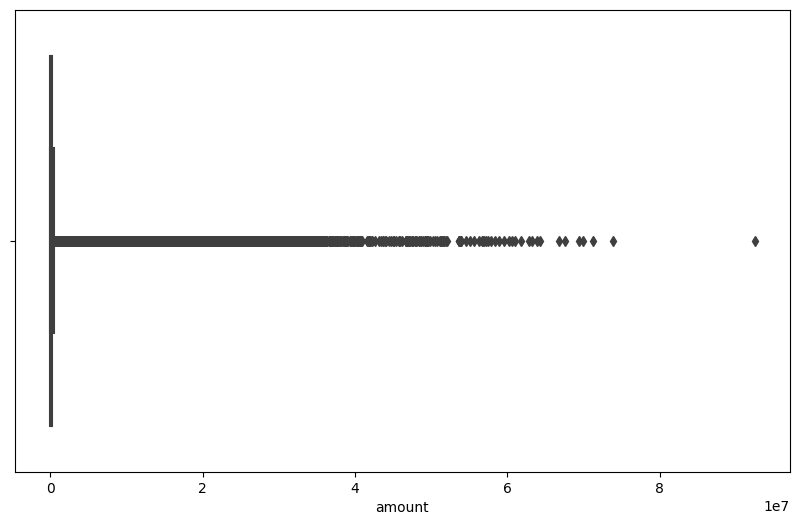

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for transaction amount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['amount'])
plt.show()


In [12]:
import numpy as np
df['amount'] = np.log1p(df['amount']) # For handling zero based values and numerical stability

In [13]:
df_numeric = df.drop(columns=['nameOrig', 'nameDest'])


In [14]:
df_numeric = pd.get_dummies(df_numeric, columns=['type'], drop_first=True)

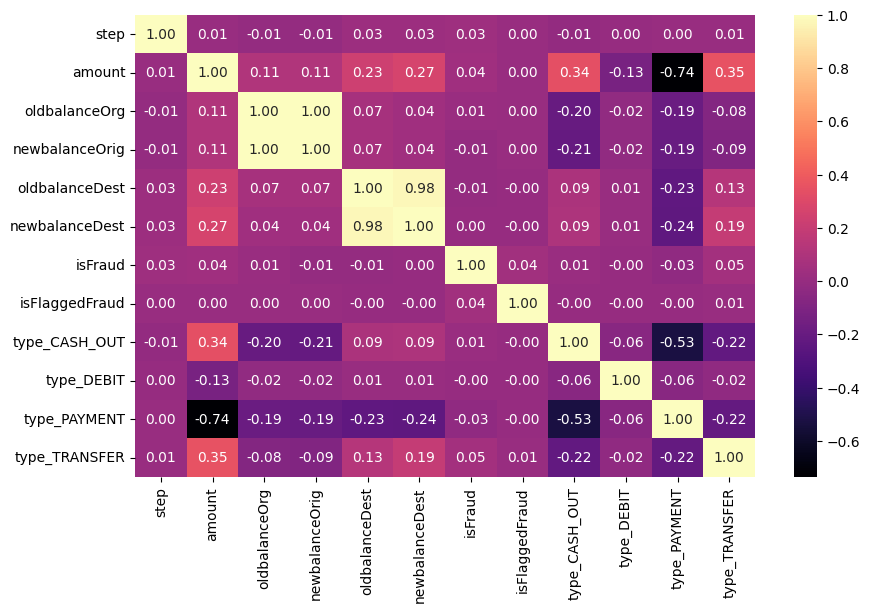

In [15]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='magma', fmt='.2f')
plt.show()


In [16]:
df_numeric['balance_change'] = df_numeric['oldbalanceOrg'] - df_numeric['newbalanceOrig']
df_numeric['dest_balance_change'] = df_numeric['oldbalanceDest'] - df_numeric['newbalanceDest']
df_numeric['transaction_ratio'] = df_numeric['amount'] / (df_numeric['oldbalanceOrg'] + 1)  # Avoid division by zero


In [17]:
df_numeric = df_numeric.drop(columns=['oldbalanceOrg'])  # Drop one of the highly correlated features
# because it might lead to overfitting, increase computational requirements and keeping
# the most relevant features for good accuracy.

In [19]:
df_numeric.columns

Index(['step', 'amount', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
       'isFraud', 'isFlaggedFraud', 'type_CASH_OUT', 'type_DEBIT',
       'type_PAYMENT', 'type_TRANSFER', 'balance_change',
       'dest_balance_change', 'transaction_ratio'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_numeric.drop(columns=['isFraud'])
y = df_numeric['isFraud']

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [22]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(),
    "LightLGM": LGBMClassifier()
}


In [31]:
# Step 1: Sample 5% of the dataset for quick evaluation
X_sample, _, y_sample, _ = train_test_split(X_train_scaled, y_train, test_size=0.95, random_state=42)

model_accuracies = {}

# Step 2: Train each model on the 5% sample
for name, model in models.items():
    model.fit(X_sample, y_sample)  # Train on small sample
    y_pred = model.predict(X_test_scaled)  # Make predictions on full test set
    accuracy = accuracy_score(y_test, y_pred)  # Evaluate accuracy

    model_accuracies[name] = accuracy  # Store accuracy
    print(f"{name}: Accuracy = {accuracy*100:.2f}%")  # Print accuracy

# Step 3: Sort and get the top 3 models
sorted_models = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
top_3_models = sorted_models[:3]

print("\nTop 3 Models Selected for Final Training:")
for rank, (model, acc) in enumerate(top_3_models, start=1):
    print(f"{rank}. {model} - Accuracy: {acc*100:.2f}%")

# Step 4: Choose the best model from top 3
best_model_name, best_accuracy = top_3_models[0]
best_model = models[best_model_name]

# Step 5: Train the best model on 80% of the full dataset
X_final_train, _, y_final_train, _ = train_test_split(X_train_scaled, y_train, test_size=0.20, random_state=42)
best_model.fit(X_final_train, y_final_train)

print(f"\nFinal Model Selected: {best_model_name} (Trained on 80% of the data)")

Logistic Regression: Accuracy = 99.92%
Random Forest: Accuracy = 99.96%
Gradient Boosting: Accuracy = 99.89%
Decision Tree: Accuracy = 99.94%
Support Vector Machine: Accuracy = 99.93%
K-Nearest Neighbors: Accuracy = 99.93%
Naive Bayes: Accuracy = 67.49%
AdaBoost: Accuracy = 99.94%
XGBoost: Accuracy = 99.96%
[LightGBM] [Info] Number of positive: 354, number of negative: 254150
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.012425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2052
[LightGBM] [Info] Number of data points in the train set: 254504, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001391 -> initscore=-6.576383
[LightGBM] [Info] Start training from score -6.576383
LightLGM: Accuracy = 99.78%

Top 3 Models Selected for Final Training:
1. XGBoost - Accuracy: 99.96%
2. Random Forest - Accuracy: 99.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Initialize XGBoost Classifier
best_model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Train on 80% of the dataset
best_model_xgb.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [29]:
from sklearn.metrics import accuracy_score
# Make predictions on test set
y_pred_final = best_model_xgb.predict(X_test_scaled)

# Evaluate final model performance
final_accuracy = accuracy_score(y_test, y_pred_final)
print(f"\nFinal XGBoost Model Accuracy: {final_accuracy*100:.2f}%")


Final XGBoost Model Accuracy: 99.98%


In [30]:
import joblib

# Save the model
joblib.dump(best_model_xgb, "xgboost_fraud_model.pkl")
print("Model saved as xgboost_fraud_model.pkl")

# To load the model later:
# loaded_model = joblib.load("xgboost_fraud_model.pkl")


Model saved as xgboost_fraud_model.pkl
